<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240221/week2_kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/lecture/medical_ai/

1stSeries_07.05.21  2ndSeries_21.05.21


In [2]:
#approach all of the data
import glob
import csv
import pandas as pd
path = "/content/drive/MyDrive/lecture/medical_ai/*/*/{}*".format('W')

df_list = []
cls_list = []
ri_list = []

for file in glob.glob(path, recursive = True) :
  df = pd.read_csv(file, skiprows=24)

  df_list.append(df)
  ri_list.append(float(file.split('/')[-2]))

  if float(file.split('/')[-2]) < 1.3 :
    cls_list.append('Normal Tissue')

  elif float(file.split('/')[-2]) >= 1.3 and float(file.split('/')[-2]) <= 1.32 :
    cls_list.append('CIN-1')

  elif float(file.split('/')[-2]) >= 1.33 and float(file.split('/')[-2]) <= 1.37 :
    cls_list.append('CIN-2')

  elif float(file.split('/')[-2]) >= 1.38 and float(file.split('/')[-2]) <= 1.39 :
    cls_list.append('CIN-3')

  elif float(file.split('/')[-2]) >= 1.39 :
    cls_list.append('Cervical Cancer')

<Axes: xlabel='1475.0000'>

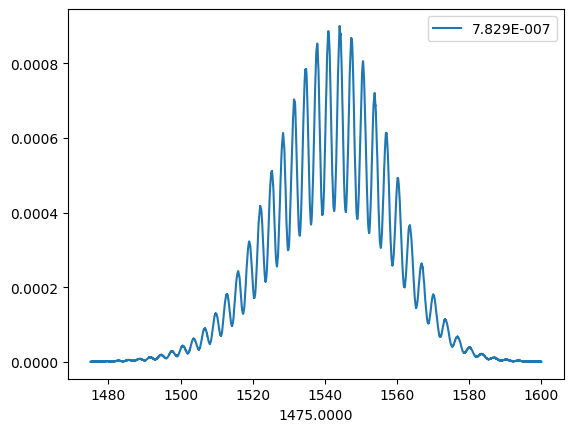

In [ ]:
#visualize a single data
df_list[0].astype(float).plot(x=0, y=1)

In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.svm import SVC, LinearSVR
import numpy as np
import time

x_cls_train, x_cls_test, y_train, y_test = train_test_split(df_list, cls_list, test_size=0.1)
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(df_list, ri_list, test_size=0.1)

nsamples, nx, ny = np.array(x_cls_train).shape
d2_x_train = np.array(x_cls_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_cls_test).shape
d2_x_test = np.array(x_cls_test).reshape((nsamples,nx*ny))


nsamples, nx, ny = np.array(x_reg_train).shape
d2_x_reg_train = np.array(x_reg_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_reg_test).shape
d2_x_reg_test = np.array(x_reg_test).reshape((nsamples,nx*ny))


In [42]:
dec_cls_model = DecisionTreeClassifier(random_state = 0)
rand_cls_model = RandomForestClassifier(max_depth=2, random_state=0)
adb_cls_model = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
light_gbm_cls_model = LGBMClassifier(learning_rate=0.1, n_estimators=100)
knn_cls_model = KNeighborsClassifier(n_neighbors = 3)
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

dec_reg_model = DecisionTreeRegressor(random_state=0)
rand_reg_model = RandomForestRegressor(max_depth=2, random_state=0)
adb_reg_model = AdaBoostRegressor(random_state=0, n_estimators=100)
light_gbm_reg_model = LGBMRegressor( max_depth=2, learning_rate=0.1, n_estimators=100)
svr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=0, tol=1e-5))

In [51]:
start_mlp_reg = time.time()
MLP_reg_model = regr = MLPRegressor(random_state=1, max_iter=500).fit(d2_x_reg_train, y_reg_train)
end_mlp_reg = time.time()

In [56]:
start_mlp_clf = time.time()
MLP_clf_model = MLPClassifier(random_state=1, max_iter=20).fit(d2_x_train, y_train)
end_mlp_clf = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
start_svm = time.time()
svm.fit(d2_x_train, y_train)
end_svm = time.time()

In [59]:
start_knn = time.time()
knn_cls_model.fit(d2_x_train, y_train)
end_knn = time.time()

In [80]:
start_dec = time.time()
dec_cls_model.fit(d2_x_train, y_train)
end_dec = time.time()

In [61]:
start_rand = time.time()
rand_cls_model.fit(d2_x_train, y_train)
end_rand = time.time()

In [62]:
start_adb = time.time()
adb_cls_model.fit(d2_x_train, y_train)
end_adb = time.time()

In [87]:
start_gbm = time.time()
light_gbm_cls_model.fit(d2_x_train, y_train)
end_gbm = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875657
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score -1.967836
[LightGBM] [Info] Start training from score -1.423108
[LightGBM] [Info] Start training from score -2.314706
[LightGBM] [Info] Start training from score -0.653000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [81]:
start_eval_dec = time.time()
dec_cls_pred = dec_cls_model.predict(d2_x_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('Accuracy of decision tree : {}'.format(accuracy_score(dec_cls_pred, y_test)))
print('f1-score of decision tree : {}'.format(f1_score(dec_cls_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 1.7506444454193115
Accuracy of decision tree : 0.9148936170212766
f1-score of decision tree : 0.8898395721925134
Testing Time : 0.0026099681854248047


In [84]:
start_eval_svm = time.time()
svm_pred = svm.predict(d2_x_test)
end_eval_svm = time.time()

print('Training Time : {}'.format(end_svm - start_svm))
print('Accuracy of SVM : {}'.format(accuracy_score(svm_pred, y_test)))
print('f1-score of SVM : {}'.format(f1_score(svm_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_svm - start_eval_svm))

Training Time : 1.820002555847168
Accuracy of SVM : 0.9574468085106383
Accuracy of SVM : 0.9415584415584415
Testing Time : 0.5063936710357666


In [83]:
start_eval_rand = time.time()
rand_cls_pred = rand_cls_model.predict(d2_x_test)
end_eval_rand = time.time()

print('Training Time : {}'.format(end_rand - start_rand))
print('Accuracy of Random Forest : {}'.format(accuracy_score(rand_cls_pred, y_test)))
print('f1-score of Random Forest : {}'.format(f1_score(rand_cls_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_rand - start_eval_rand))

Training Time : 0.7814180850982666
Accuracy of Random Forest : 0.7446808510638298
Accuracy of Random Forest : 0.5211504683840749
Testing Time : 0.04067492485046387


In [85]:
start_eval_adb = time.time()
adb_cls_pred = adb_cls_model.predict(d2_x_test)
end_eval_adb = time.time()

print('Training Time : {}'.format(end_adb - start_adb))
print('Accuracy of Adaboost : {}'.format(accuracy_score(adb_cls_pred, y_test)))
print('f1-score of Adaboost : {}'.format(f1_score(adb_cls_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_adb - start_eval_adb))

Training Time : 34.993332862854004
Accuracy of Adaboost : 0.6808510638297872
Accuracy of Adaboost : 0.5210945740067972
Testing Time : 0.12491869926452637


In [89]:
start_eval_gbm = time.time()
gbm_cls_pred = light_gbm_cls_model.predict(d2_x_test)
end_eval_gbm = time.time()

print('Training Time : {}'.format(end_gbm - start_gbm))
print('Accuracy of LightGBM : {}'.format(accuracy_score(gbm_cls_pred, y_test)))
print('f1-score of LightGBM : {}'.format(f1_score(gbm_cls_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_gbm - start_eval_gbm))

Training Time : 124.23837280273438
Accuracy of LightGBM : 1.0
f1-score of LightGBM : 1.0
Testing Time : 0.00864410400390625


In [90]:
start_eval_knn = time.time()
knn_cls_pred = knn_cls_model.predict(d2_x_test)
end_eval_knn = time.time()

print('Training Time : {}'.format(end_knn - start_knn))
print('Accuracy of KNN : {}'.format(accuracy_score(knn_cls_pred, y_test)))
print('f1-score of KNN : {}'.format(f1_score(knn_cls_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_knn - start_eval_knn))

Training Time : 0.02248835563659668
Accuracy of KNN : 0.9574468085106383
f1-score of KNN : 0.9223707664884135
Testing Time : 0.12195920944213867


In [97]:
start_dec = time.time()
dec_reg_model.fit(d2_x_reg_train, y_reg_train)
end_dec = time.time()

In [98]:
start_rand = time.time()
rand_reg_model.fit(d2_x_reg_train, y_reg_train)
end_rand = time.time()

In [96]:
start_adb = time.time()
adb_reg_model.fit(d2_x_reg_train, y_reg_train)
end_adb = time.time()

In [99]:
start_lgbm = time.time()
light_gbm_reg_model.fit(d2_x_reg_train, y_reg_train)
end_lgbm = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875648
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score 1.399928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [100]:
start_svr = time.time()
svr.fit(d2_x_reg_train, y_reg_train)
end_svr = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [101]:
start_eval_dec = time.time()
dec_reg_pred = dec_reg_model.predict(d2_x_reg_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('MSE of decision tree : {}'.format(mean_squared_error(y_reg_test, dec_reg_pred)))
print('R-squared of decision tree : {}'.format(r2_score(y_reg_test, dec_reg_pred)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 2.2020483016967773
MSE of decision tree : 0.000868085106382978
R-squared of decision tree : 0.7917101147028153
Testing Time : 0.0023953914642333984


In [104]:
start_eval_rand = time.time()
rand_reg_pred = rand_reg_model.predict(d2_x_reg_test)
end_eval_rand = time.time()

print('Training Time : {}'.format(end_rand - start_rand))
print('MSE of Random Forest : {}'.format(mean_squared_error(y_reg_test, rand_reg_pred)))
print('R-squared of Random Forest : {}'.format(r2_score(y_reg_test, rand_reg_pred)))
print('Testing Time : {}'.format(end_eval_rand - start_eval_rand))

Training Time : 34.09543776512146
MSE of Random Forest : 0.0017545660116399747
R-squared of Random Forest : 0.5790063086860544
Testing Time : 0.01639723777770996


In [105]:
start_eval_adb = time.time()
adb_reg_pred = adb_reg_model.predict(d2_x_reg_test)
end_eval_adb = time.time()

print('Training Time : {}'.format(end_adb - start_adb))
print('MSE of AdaBoost : {}'.format(mean_squared_error(y_reg_test, adb_reg_pred)))
print('r-squared of AdaBoost : {}'.format(r2_score(y_reg_test, adb_reg_pred)))
print('Testing Time : {}'.format(end_eval_adb - start_eval_adb))

Training Time : 77.95996618270874
MSE of AdaBoost : 0.0006260874080856874
r-squared of AdaBoost : 0.8497754730990088
Testing Time : 0.07706022262573242


In [106]:
start_eval_lgbm = time.time()
light_gbm_reg_pred = light_gbm_reg_model.predict(d2_x_reg_test)
end_eval_lgmb = time.time()

print('Training Time : {}'.format(end_lgbm - start_lgbm))
print('MSE of lightGBM : {}'.format(mean_squared_error(y_reg_test, light_gbm_reg_pred)))
print('R-squared of lightGBM : {}'.format(mean_squared_error(y_reg_test, light_gbm_reg_pred)))
print('Testing Time : {}'.format(end_eval_lgmb - start_eval_lgbm))

Training Time : 5.317127704620361
MSE of lightGBM : 0.00028009618578675
R-squared of lightGBM : 0.00028009618578675
Testing Time : 0.013421058654785156


In [107]:
start_eval_svr = time.time()
svr_pred = svr.predict(d2_x_reg_test)
end_eval_svr = time.time()

print('Training Time : {}'.format(end_svr - start_svr))
print('MSE of SVR : {}'.format(mean_squared_error(y_reg_test, svr_pred)))
print('R-squared of SVR : {}'.format(r2_score(y_reg_test, svr_pred)))
print('Testing Time : {}'.format(end_eval_svr - start_eval_svr))

Training Time : 24.23477840423584
MSE of SVR : 0.0014114585439873424
R-squared of SVR : 0.6613321250795052
Testing Time : 0.010141134262084961


In [88]:
start_eval_mlp_clf = time.time()
mlp_clf_pred = MLP_clf_model.predict(d2_x_test)
end_eval_mlp_clf = time.time()

print('Training Time : {}'.format(end_mlp_clf - start_mlp_clf))
print('Accuracy of MLP : {}'.format(accuracy_score(mlp_clf_pred, y_test)))
print('f1-score of MLP : {}'.format(f1_score(mlp_clf_pred, y_test,average="macro")))
print('Testing Time : {}'.format(end_eval_mlp_clf - start_eval_mlp_clf))

Training Time : 7.891954183578491
Accuracy of MLP : 0.5531914893617021
f1-score of MLP : 0.1780821917808219
Testing Time : 0.030122041702270508


In [52]:
start_eval_mlp_reg = time.time()
mlp_reg_pred = MLP_reg_model.predict(d2_x_reg_test)
end_eval_mlp_reg = time.time()

print('Training Time : {}'.format(end_mlp_reg - start_mlp_reg))
print('MSE of MLP : {}'.format(mean_squared_error(y_reg_test, mlp_reg_pred)))
print('R-squared of MLP : {}'.format(r2_score(y_reg_test, mlp_reg_pred)))
print('Testing Time : {}'.format(end_eval_mlp_reg - start_eval_mlp_reg))

Training Time : 7.377873182296753
MSE of MLP : 0.8771228446678154
R-squared of MLP : -209.45841630509287
Testing Time : 0.014823198318481445


In [53]:
for i, v in enumerate(y_reg_test) :
  print('true : ' + str(v) + '\t pred : ' + str(mlp_reg_pred[i]))

true : 1.33	 pred : 0.4663177004569431
true : 1.44	 pred : 0.46631765401201997
true : 1.4	 pred : 0.46631771302608793
true : 1.33	 pred : 0.4663175036852377
true : 1.44	 pred : 0.46631763883141464
true : 1.35	 pred : 0.46631755048763845
true : 1.36	 pred : 0.46631782153434276
true : 1.3	 pred : 0.4663174600868881
true : 1.43	 pred : 0.46631767307470684
true : 1.34	 pred : 0.4663178568405453
true : 1.49	 pred : 0.46631761764342516
true : 1.32	 pred : 0.46631763624667055
true : 1.43	 pred : 0.46631765677040793
true : 1.39	 pred : 0.4663174953716823
true : 1.32	 pred : 0.46631754495096245
true : 1.39	 pred : 0.4663174866408114
true : 1.45	 pred : 0.46631760833883884
true : 1.42	 pred : 0.46631768854426114
true : 1.5	 pred : 0.46631766805300423
true : 1.32	 pred : 0.4663173709138585
true : 1.41	 pred : 0.4663175019873309
true : 1.37	 pred : 0.46631768456357126
true : 1.32	 pred : 0.46631741411495486
true : 1.5	 pred : 0.4663175508068824
true : 1.37	 pred : 0.46631760252992627
true : 1.44	 

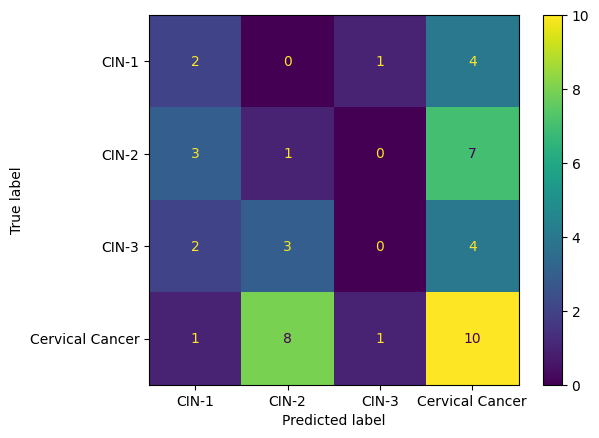

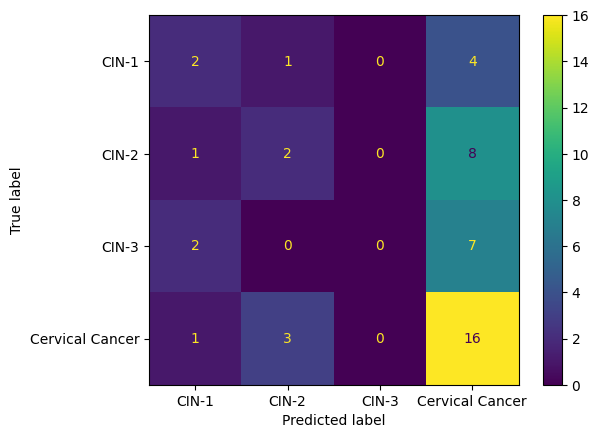

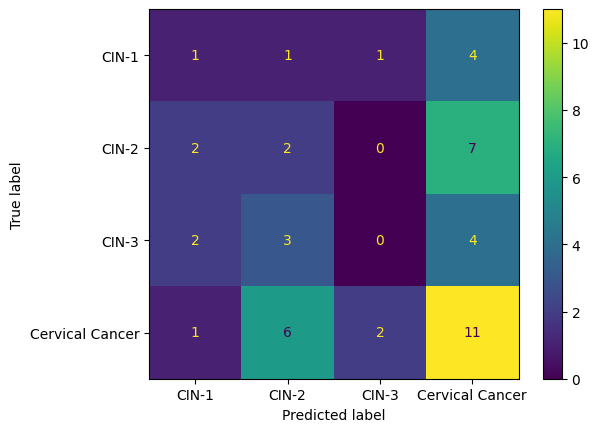

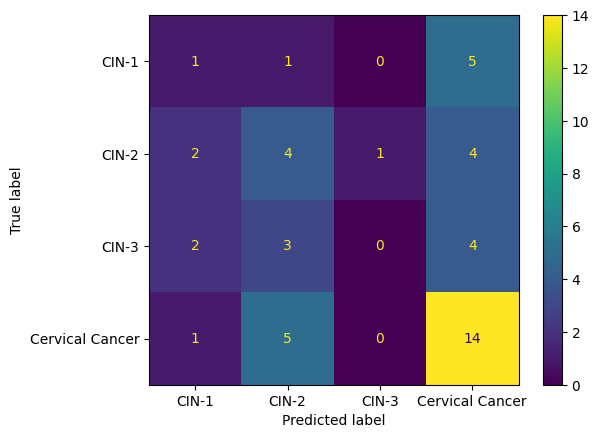

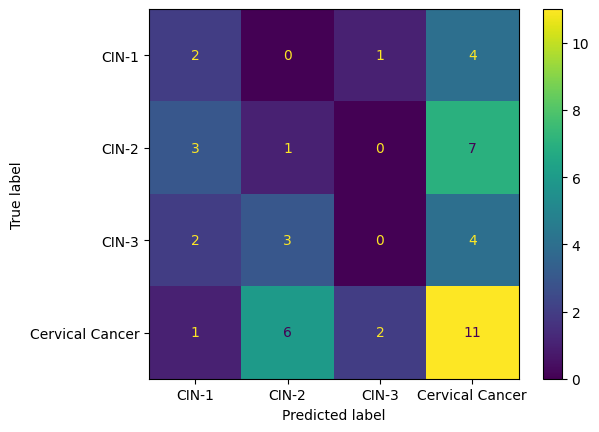

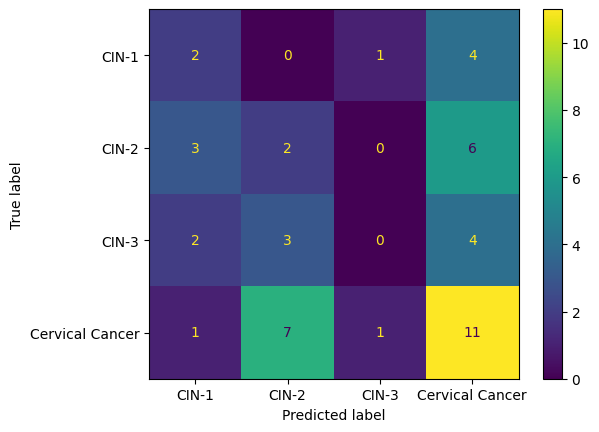

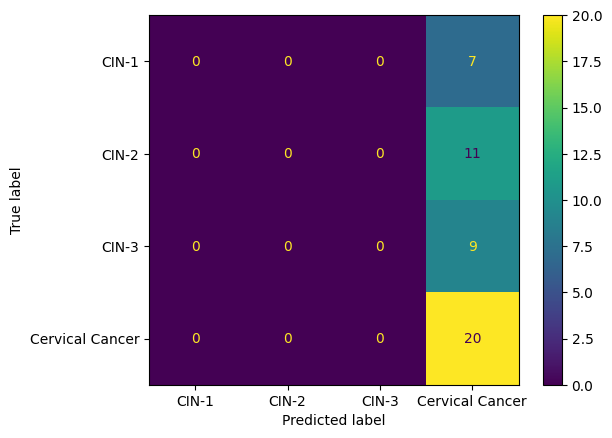

In [112]:
preds = [dec_cls_pred, rand_cls_pred, svm_pred, adb_cls_pred, gbm_cls_pred, knn_cls_pred, mlp_clf_pred]
models = [dec_cls_model, rand_cls_model, svm, adb_cls_model, light_gbm_cls_model, knn_cls_model, MLP_clf_model]
for i, pred in enumerate(preds):
  cm = confusion_matrix(y_test, pred, labels=models[i].classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[i].classes_)
  disp.plot()